# Predictive Analytics on Monthly Website Visits (24 months)

In [6]:
# Import necessasy librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")



#### Load Data

In [9]:
data = {
    'Month': pd.date_range(start='2022-01-01', periods=24, freq='MS'),
    'Visits': [
        1200, 1250, 1300, 1350, 1400, 1450, 1500, 1600, 1650, 1700, 1750, 1800,
        1850, 1900, 1950, 2000, 2050, 2100, 2200, 2250, 2300, 2350, 2400, 2450
    ]
}
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

#### Plot the original Data


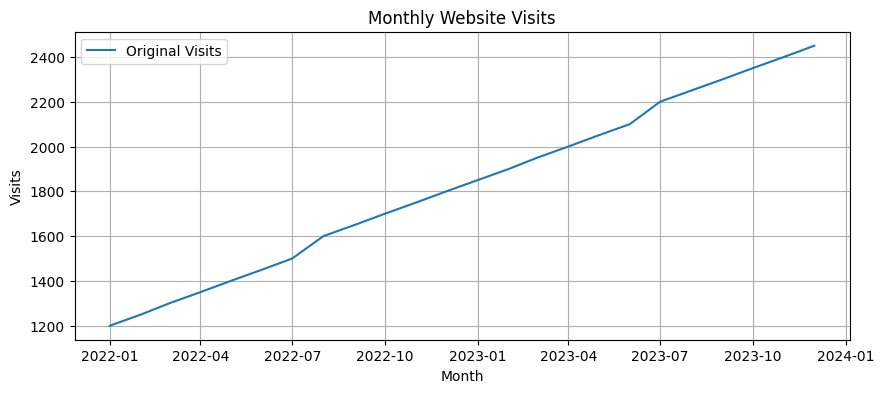

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(df, label='Original Visits')
plt.title('Monthly Website Visits')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.show()

#### ARIMA Model


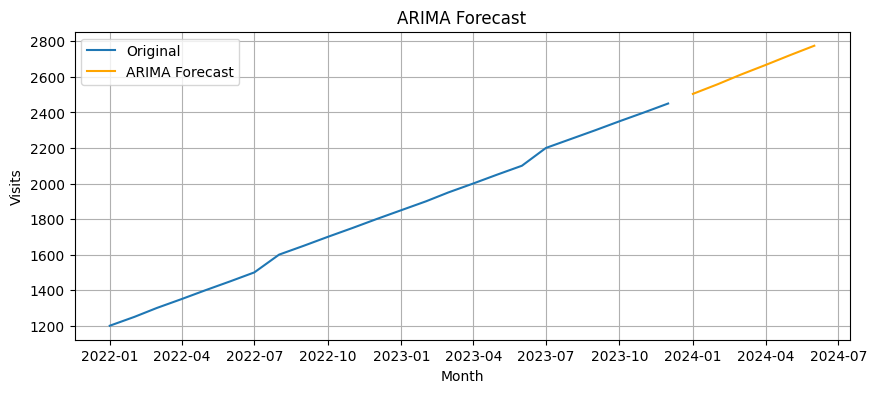

In [11]:
arima_model = ARIMA(df, order=(1, 1, 1)).fit()
arima_forecast = arima_model.forecast(steps=6)
arima_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

plt.figure(figsize=(10, 4))
plt.plot(df, label='Original')
plt.plot(arima_index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.show()

#### SARIMA Model

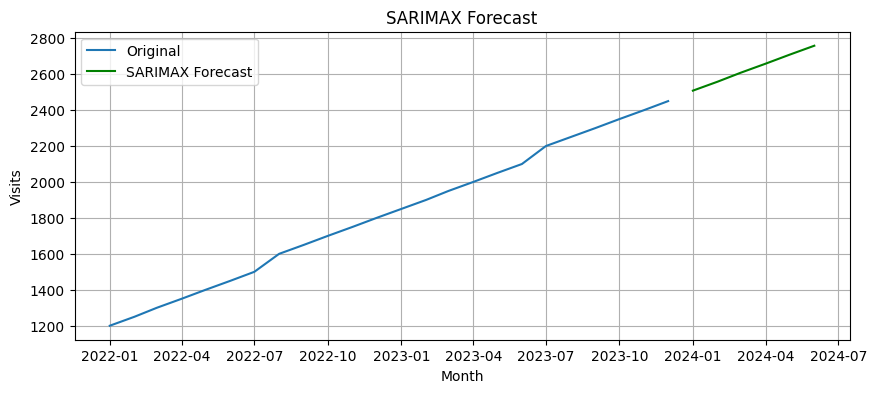

In [12]:
sarimax_model = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()
sarimax_forecast = sarimax_model.forecast(steps=6)
sarimax_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

plt.figure(figsize=(10, 4))
plt.plot(df, label='Original')
plt.plot(sarimax_index, sarimax_forecast, label='SARIMAX Forecast', color='green')
plt.title('SARIMAX Forecast')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.legend()
plt.grid(True)
plt.show()


#### Prophet Model

23:58:14 - cmdstanpy - INFO - Chain [1] start processing
23:58:14 - cmdstanpy - INFO - Chain [1] done processing


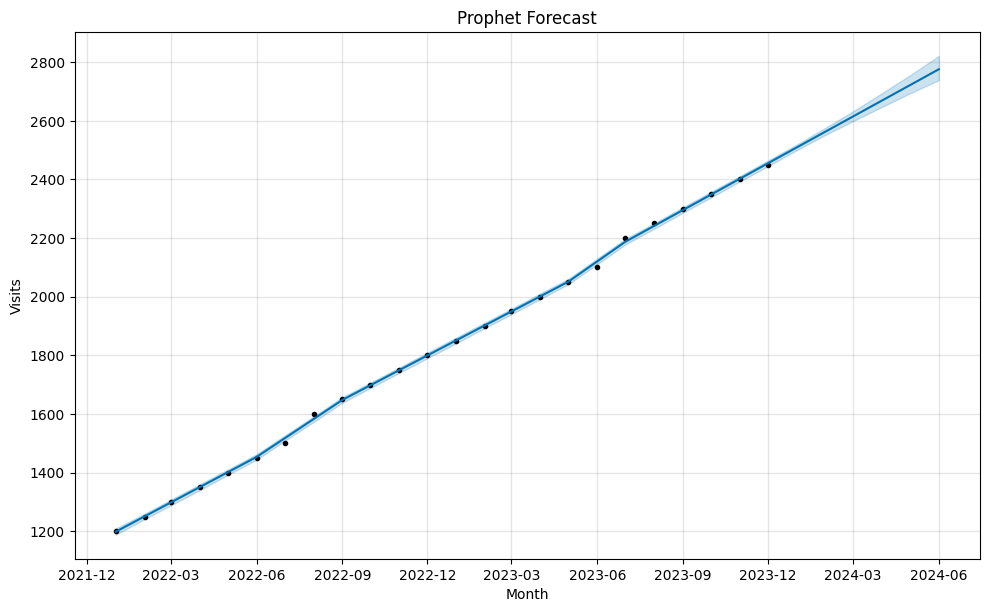

In [13]:
df_prophet = df.reset_index().rename(columns={'Month': 'ds', 'Visits': 'y'})
prophet_model = Prophet()
prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=6, freq='MS')
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Month')
plt.ylabel('Visits')
plt.grid(True)
plt.show()

#### Forecast Print

In [15]:
print("\n ARIMA Forecast (Next 6 Months)")
print(pd.DataFrame({'Month': arima_index, 'Visits': arima_forecast.values.astype(int)}))

print("\n SARIMAX Forecast (Next 6 Months)")
print(pd.DataFrame({'Month': sarimax_index, 'Visits': sarimax_forecast.values.astype(int)}))

print("\n Prophet Forecast (Next 6 Months)")
print(forecast[['ds', 'yhat']].tail(6).rename(columns={'ds': 'Month', 'yhat': 'Visits'}))




 ARIMA Forecast (Next 6 Months)
       Month  Visits
0 2024-01-01    2504
1 2024-02-01    2558
2 2024-03-01    2612
3 2024-04-01    2666
4 2024-05-01    2720
5 2024-06-01    2775

 SARIMAX Forecast (Next 6 Months)
       Month  Visits
0 2024-01-01    2508
1 2024-02-01    2558
2 2024-03-01    2608
3 2024-04-01    2658
4 2024-05-01    2708
5 2024-06-01    2758

 Prophet Forecast (Next 6 Months)
        Month       Visits
24 2024-01-01  2509.223055
25 2024-02-01  2563.509019
26 2024-03-01  2614.292663
27 2024-04-01  2668.578627
28 2024-05-01  2721.113431
29 2024-06-01  2775.399395


# Submitted by Nakul